In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import lsst.sims.maf.db as db


In [2]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 16

In [18]:
# load opsim database
dbpath_v15 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

dbpath_v17 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"

dbpath_v171 = "/home/idies/workspace/lsst_cadence/FBS_1.7.1/"


# output directory
#dataRawDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/tGaps/'

outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir/footprints/'


In [4]:
# get the name of all opsim dbs 
import glob

workpath = os.getcwd()
#workpath = '/home/idies/workspace/Storage/lixl/persistent/LSST_OpSim/unknowns'

os.chdir(dbpath_v15)  # change to opsim database directory
dblist_v15 = glob.glob('*.db') 

os.chdir(dbpath_v17)  # change to opsim database directory
dblist_v17 = glob.glob('*.db') 

os.chdir(dbpath_v171)  # change to opsim database directory
dblist_v171 = glob.glob('*.db') 

os.chdir(workpath) # change back to work directory

dblist_v15.sort()
dblist_v17.sort()
dblist_v171.sort()


In [5]:
dbpath = dbpath_v15
dblist_all = dblist_v15

# check proposal information
propdic = {}
for i, dbname in enumerate( dblist_all ):
    #dbname=dblist_all[4]
    #dbname="pair_strategy_0_v1.5_10yrs.db"
    #dbname = "sat_dodge_v1.4_10yrs.db"
    opsdb = db.OpsimDatabase(dbpath+dbname)
    
    propInfo = opsdb.fetchPropInfo()[0]
    print(i, dbname)
    propdic[dbname] = propInfo
prop_df = pd.DataFrame(propdic).T


0 agnddf_v1.5_10yrs.db
1 alt_dust_v1.5_10yrs.db
2 alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db
3 baseline_2snaps_v1.5_10yrs.db
4 baseline_samefilt_v1.5_10yrs.db
5 baseline_v1.5_10yrs.db
6 bulges_bs_v1.5_10yrs.db
7 bulges_bulge_wfd_v1.5_10yrs.db
8 bulges_cadence_bs_v1.5_10yrs.db
9 bulges_cadence_bulge_wfd_v1.5_10yrs.db
10 bulges_cadence_i_heavy_v1.5_10yrs.db
11 bulges_i_heavy_v1.5_10yrs.db
12 daily_ddf_v1.5_10yrs.db
13 dcr_nham1_ug_v1.5_10yrs.db
14 dcr_nham1_ugr_v1.5_10yrs.db
15 dcr_nham1_ugri_v1.5_10yrs.db
16 dcr_nham2_ug_v1.5_10yrs.db
17 dcr_nham2_ugr_v1.5_10yrs.db
18 dcr_nham2_ugri_v1.5_10yrs.db
19 descddf_v1.5_10yrs.db
20 filterdist_indx1_v1.5_10yrs.db
21 filterdist_indx2_v1.5_10yrs.db
22 filterdist_indx3_v1.5_10yrs.db
23 filterdist_indx4_v1.5_10yrs.db
24 filterdist_indx5_v1.5_10yrs.db
25 filterdist_indx6_v1.5_10yrs.db
26 filterdist_indx7_v1.5_10yrs.db
27 filterdist_indx8_v1.5_10yrs.db
28 footprint_add_mag_cloudsv1.5_10yrs.db
29 footprint_big_sky_dustv1.5_10yrs.db
30 footprint_big_sky_

In [7]:
prop_df.head()

0    1           2           3   \
agnddf_v1.5_10yrs.db                       Other  WFD    DD: EDFS   DD:COSMOS   
alt_dust_v1.5_10yrs.db                     Other  WFD  DD:XMM-LSS  DD:ELAISS1   
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db  Other  WFD  DD:XMM-LSS    DD:ECDFS   
baseline_2snaps_v1.5_10yrs.db              Other  WFD     DD:EDFS  DD:ELAISS1   
baseline_samefilt_v1.5_10yrs.db            Other  WFD  DD:XMM-LSS     DD:EDFS   

                                                   4           5           6   \
agnddf_v1.5_10yrs.db                          DD:EDFS  DD:XMM-LSS    DD:ECDFS   
alt_dust_v1.5_10yrs.db                        DD:EDFS    DD:ECDFS   DD:COSMOS   
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db     DD:EDFS   DD:COSMOS  DD:ELAISS1   
baseline_2snaps_v1.5_10yrs.db              DD:XMM-LSS    DD:ECDFS   DD:COSMOS   
baseline_samefilt_v1.5_10yrs.db            DD:ELAISS1    DD:ECDFS   DD:COSMOS   

                                                   7    8    9    10   11  
agnddf_v1.5_10yrs.db                       DD:ELAISS1  NaN  NaN  NaN  NaN  
alt_dust_v1.5_10yrs.db                            NaN  NaN  NaN  NaN  NaN  
alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db         NaN  NaN  NaN  NaN  NaN  
baseline_2snaps_v1.5_10yrs.db                     NaN  NaN  NaN  NaN  NaN  
baseline_samefilt_v1.5_10yrs.db                   NaN  NaN  NaN  NaN  NaN

In [8]:
#  get columns from databases
def get_cols(dbfile, cols='night', lim=None):
    """
    cols = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
    connect to database
    Returns: a pandas DataFrame
    
    Examples:
    
    cols = 'night, observationStartMJD, fieldRA, filter, fieldDec, proposalId, note, '

    df = get_cols(dbfile=dbpath + db, cols=cols, lim='night<300')
   
    """
    import sqlite3
    import pandas as pd
    connection = sqlite3.connect(dbfile)
    cursor = connection.cursor()
    
    if lim!=None:
        sqlstr = "SELECT {} FROM SummaryAllProps where {}".format(cols, lim)
    else:
        sqlstr = "SELECT {} FROM SummaryAllProps".format(cols)

    print('connect to ', dbfile, '\n', sqlstr)
    cursor.execute(sqlstr)
    data = cursor.fetchall()
    
    # convert data to dataframe
    data_df = pd.DataFrame(data, columns=cols.split(', '))
    
    # close connection
    connection.close()
    
    return data_df

def get_pixId(df, nside=16):
    '''get pixId for each field'''
    pixId = RADec2pix(nside, ra=df['fieldRA'].values, dec=df['fieldDec'].values)
    df['pixId'] = pixId
    return df

def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

def RADec2pix(nside, ra, dec, degree=True):
    """
    Calculate the nearest healpixel ID of an RA/Dec array, assuming nside.

    Parameters
    ----------
    nside : int
        The nside value of the healpix grid.
    ra : numpy.ndarray
        The RA values to be converted to healpix ids, in degree by default.
    dec : numpy.ndarray
        The Dec values to be converted to healpix ids, in degree by default.

    Returns
    -------
    numpy.ndarray
        The healpix ids.
    """
    if degree:
        ra = np.radians(ra) # change to radians
        dec = np.radians(dec)
    
    lat = np.pi/2. - dec
    hpid = hp.ang2pix(nside, lat, ra )
    return hpid

def radec2xyz(ra, dec):
    '''convert ra/dec to xyz'''
    theta = 0.5 * np.pi - np.deg2rad(dec)
    phi = np.deg2rad(ra)
    xyz = hp.ang2vec(theta, phi)
    
    return xyz

def radec2gal(ra, dec):
    '''convert from ra/dec to galactic l/b'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(ra=ra, dec=dec, 
                 unit=(u.degree, u.degree))
    
    l = c.galactic.l.degree
    b = c.galactic.b.degree
    return l, b

def gal2radec(gl, gb):
    '''convert gl/gb to ra/dec'''
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    c = SkyCoord(l=gl, b=gb, frame="galactic",
                unit=(u.degree, u.degree))
    ra = c.icrs.ra.degree
    dec = c.icrs.dec.degree
    return ra, dec


# plot function
# plot skymap

def plot_mwd(ax, RA, Dec, c, org=0, title='Mollweide projection', projection='mollweide', vmax=None, colorbar=True, **kwargs):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
        
    '''
    import numpy as np
    import matplotlib.pyplot as plt

    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, marker='o', vmin=0, vmax=vmax, **kwargs)  # convert degrees to radians
    # ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
    #cbar.set_clim(-2.0, 2.0)

def plot_filter_Nv(df, coord='C', figsize= (12, 6), colorbar=True, vmax=None, **kwargs):
    """plot number of visits in 6 filters"""
    
    fig, axs = plt.subplots(2, 3, figsize=figsize,
                            subplot_kw={'projection': 'mollweide'}); 
    axs = axs.ravel()
    FILTERS = ['u', 'g', 'r', 'i', 'z', 'y']
    for i, f in enumerate(FILTERS):
        
        df_f = df[ df['filter']==f ]
        if coord=='G':
            x = df_f['fieldGl'].values
            y = df_f['fieldGb'].values       
        else:
            x = df_f['fieldRA'].values
            y = df_f['fieldDec'].values
        c = df_f['Nv'].values
        if len(c)!=0:
            plot_mwd(axs[i], x, y, c, title=f, colorbar=colorbar, vmax=vmax, **kwargs)
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])
        axs[i].set_title(f)



In [11]:
dblist_v15[5]

'baseline_v1.5_10yrs.db'

###  footprint one opsim

In [54]:
# baseline
#dbname = 'baseline_v1.5_10yrs.db'
dbname = dblist_v15[5]


# get some data from opsim database
COLS = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
lim = 'night>365 and night<730'
df_opsim = get_cols(dbfile=dbpath + dbname, cols=COLS, lim=lim)

# get healpix Ids
NSIDE = 16
df_opsim = get_pixId(df_opsim, nside=NSIDE)

# in galactic coordinates
df_opsim['fieldGl'], df_opsim['fieldGb'] = radec2gal(ra=df_opsim['fieldRA'].values, dec=df_opsim['fieldDec'].values)




connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night>365 and night<730


In [55]:
df_opsim.head()

night  observationStartMJD     fieldRA   fieldDec filter  proposalId  \
0    366         60215.107993  324.394315 -43.815009      y           1   
1    366         60215.108410  325.549080 -46.599342      y           1   
2    366         60215.108825  322.248346 -48.722631      y           1   
3    366         60215.109244  326.886400 -49.358597      y           1   
4    366         60215.109909  354.263301 -52.879754      y           1   

          note  pixId     fieldGl    fieldGb  
0  blob, zy, a   2585  356.547635 -47.860801  
1  blob, zy, a   2702  352.244777 -48.238232  
2  blob, zy, a   2702  349.781595 -45.664836  
3  blob, zy, a   2702  347.894925 -48.492503  
4  blob, zy, a   2807  326.140455 -60.767448

In [13]:
#fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
#                            subplot_kw={'projection': 'mollweide'}); 

#plot_mwd(ax, x, y, c, title='') 



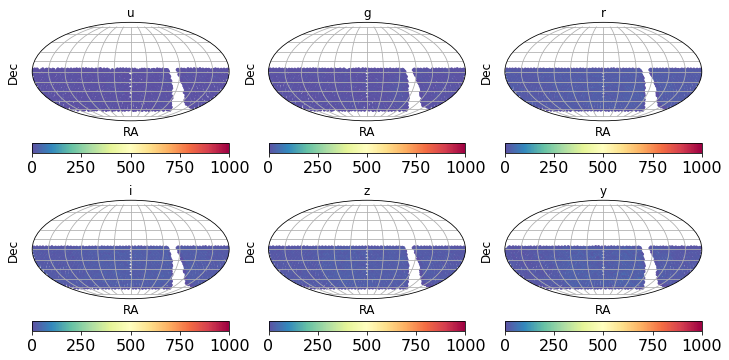

In [58]:
slicer = df_opsim['proposalId'] == 1 
df = df_opsim[slicer]
# groupby healpix
bydic = {
    "observationStartMJD": "count",
    "fieldRA" : "mean",
    "fieldDec": "mean",
    "fieldGl" : "min",
    "fieldGb": "min",
}
df = df.groupby(by=['pixId','filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})

plot_filter_Nv(df, coord='C', figsize=(12, 6), vmax=1000, s=5, cmap=plt.cm.Spectral_r)



### footprint v1.5 within 2yrs

In [17]:
%%time
# plot footprint for all opsims

COLS = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
lim = 'night<730'
# get healpix Ids
NSIDE = 16

df_dic = {}
for dbname in dblist_v15:
    # get some data from opsim database

    df_opsim = get_cols(dbfile=dbpath_v15 + dbname, cols=COLS, lim=lim)
    df_opsim = get_pixId(df_opsim, nside=NSIDE)
    # in galactic coordinates
    df_opsim['fieldGl'], df_opsim['fieldGb'] = radec2gal(ra=df_opsim['fieldRA'].values, dec=df_opsim['fieldDec'].values)
    df_dic[dbname] = df_opsim
    


connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/agnddf_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_dust_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_2snaps_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/baseline_samefilt_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps whe

connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/goodseeing_gri_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/goodseeing_griz_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/goodseeing_gz_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/goodseeing_i_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/greedy_footprint_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where 

connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.90_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.95_noddf_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.95_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.99_noddf_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.5/wfd_depth_scale0.99_v1.5_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposa

In [10]:
#df_opsim = df_dic[dblist_all[5]]

In [13]:
#df_opsim[ df_opsim['note'].str.contains("DD") ]

night  observationStartMJD    fieldRA   fieldDec filter  proposalId  \
534          1         59854.210978  10.323732 -44.116700      y           3   
535          1         59854.211360  10.323732 -44.116700      y           3   
536          1         59854.211742  10.323732 -44.116700      y           3   
537          1         59854.212124  10.323732 -44.116700      y           3   
538          1         59854.212506  10.323732 -44.116700      y           3   
539          1         59854.212888  10.323732 -44.116700      y           3   
540          1         59854.213270  10.323732 -44.116700      y           3   
541          1         59854.213652  10.323732 -44.116700      y           3   
542          1         59854.214034  10.323732 -44.116700      y           3   
543          1         59854.214416  10.323732 -44.116700      y           3   
544          1         59854.214798  10.323732 -44.116700      y           3   
545          1         59854.215180  10.323732 -44.116700      y           3   
546          1         59854.215562  10.323732 -44.116700      y           3   
547          1         59854.215943  10.323732 -44.116700      y           3   
548          1         59854.216325  10.323732 -44.116700      y           3   
549          1         59854.216707  10.323732 -44.116700      y           3   
550          1         59854.217089  10.323732 -44.116700      y           3   
551          1         59854.217471  10.323732 -44.116700      y           3   
552          1         59854.217853  10.323732 -44.116700      y           3   
553          1         59854.218235  10.323732 -44.116700      y           3   
554          1         59854.219983  10.323732 -44.116700      g           3   
555          1         59854.220365  10.323732 -44.116700      g           3   
556          1         59854.220747  10.323732 -44.116700      g           3   
557          1         59854.221129  10.323732 -44.116700      g           3   
558          1         59854.221511  10.323732 -44.116700      g           3   
559          1         59854.221893  10.323732 -44.116700      g           3   
560          1         59854.222274  10.323732 -44.116700      g           3   
561          1         59854.222656  10.323732 -44.116700      g           3   
562          1         59854.223038  10.323732 -44.116700      g           3   
563          1         59854.223420  10.323732 -44.116700      g           3   
...        ...                  ...        ...        ...    ...         ...   
2224004   3686         63506.355163  58.860181 -48.827113      y           5   
2224005   3686         63506.355545  58.860181 -48.827113      y           5   
2224006   3686         63506.355927  58.860181 -48.827113      y           5   
2224007   3686         63506.356309  58.860181 -48.827113      y           5   
2224008   3686         63506.356691  58.860181 -48.827113      y           5   
2224009   3686         63506.357073  58.860181 -48.827113      y           5   
2224010   3686         63506.357455  58.860181 -48.827113      y           5   
2224011   3686         63506.357836  58.860181 -48.827113      y           5   
2224012   3686         63506.358253  63.493699 -47.147116      y           5   
2224013   3686         63506.358635  63.493699 -47.147116      y           5   
2224014   3686         63506.359017  63.493699 -47.147116      y           5   
2224015   3686         63506.359399  63.493699 -47.147116      y           5   
2224016   3686         63506.359781  63.493699 -47.147116      y           5   
2224017   3686         63506.360163  63.493699 -47.147116      y           5   
2224018   3686         63506.360545  63.493699 -47.147116      y           5   
2224019   3686         63506.360927  63.493699 -47.147116      y           5   
2224020   3686         63506.361309  63.493699 -47.147116      y           5   
2224021   3686         63506.361725  58.860181 -48.827113      y           5   
2224022  

In [20]:
import pickle
pkfile = '/home/idies/workspace/Temporary/lixl/scratch/outDir/footprints/dic_df_opsim_v15_2yrs.pkl'
with open( pkfile, 'wb' ) as f:
    pickle.dump(df_dic, f)

In [ ]:
# load from pickle file
#with open(filename, ‘rb’) as f:
#    var_you_want_to_load_into = pickle.load(f)

CPU times: user 34.8 s, sys: 19.5 s, total: 54.3 s
Wall time: 33 s


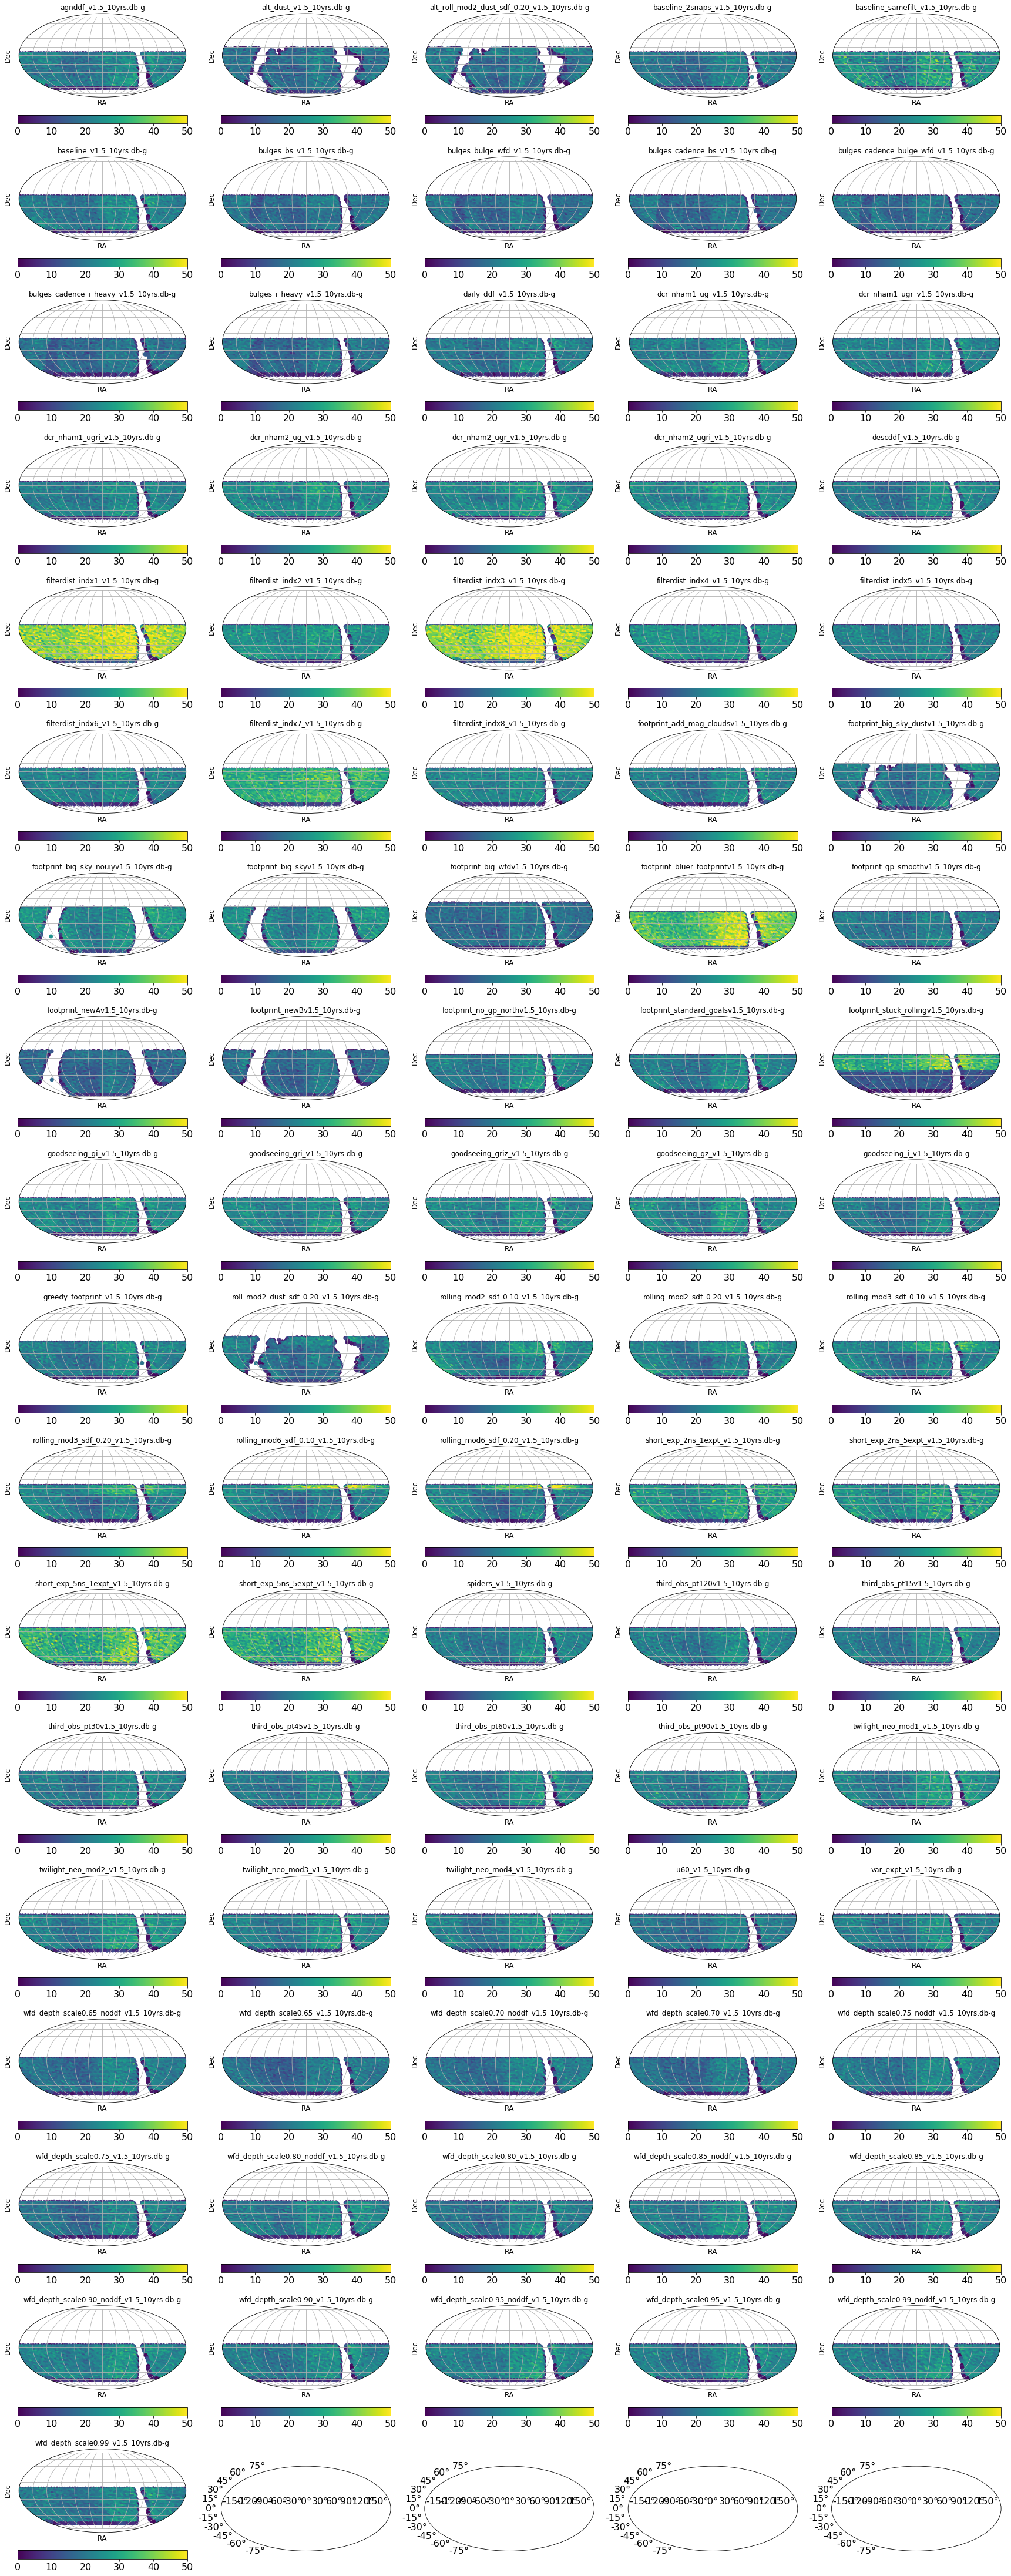

In [34]:
%%time

# groupby healpix
bydic = {
        "observationStartMJD": "count",
        "fieldRA" : "mean",
        "fieldDec": "mean",
        "fieldGl" : "min",
        "fieldGb": "min",
    }
f = 'g'
coord = 'C'

fig, axs = plt.subplots(18, 5, figsize=(30, 80),
                            subplot_kw={'projection': 'mollweide'}); 
axs = axs.flatten()

for i, dbname in enumerate( dblist_all ):  
    df_opsim = df_dic[dbname]
    #if i==31:
    #    # for opsim without proposal info
    #    df = df_opsim
    #else:
    slicer = df_opsim['proposalId'] == 1 
    df = df_opsim[slicer]

    df = df.groupby(by=['pixId','filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})
    
    df_f = df[ df['filter']==f ]
    if coord=='G':
        x = df_f['fieldGl'].values
        y = df_f['fieldGb'].values       
    else:
        x = df_f['fieldRA'].values
        y = df_f['fieldDec'].values
    c = df_f['Nv'].values
    if len(c)!=0:
        plot_mwd(axs[i], x, y, c, title=f, colorbar=True, vmax=50,)
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    axs[i].set_title(dbname + '-' + f)

    

In [35]:
fig.savefig(outDir+"footprint_v15_2yrs.png")

In [27]:
df_Nv = pd.DataFrame(columns=['db','u', 'g', 'r', 'i', 'z', 'y'])

for dbname in dblist_v15:

    df_one = df_dic[ dbname ]
    df_wfd = df_one[df_one.proposalId==1]
    Nv_dic = df_wfd.groupby(by='filter').count()['observationStartMJD'].to_dict()
    
    Nv_dic['db'] = dbname
    df_Nv.loc[len(df_Nv.index)] = Nv_dic


In [29]:
outDir

'/home/idies/workspace/Temporary/lixl/scratch/outDir/footprints/'

In [30]:
df_Nv.to_csv(outDir+"df_Nv_v15_2yrs.csv", index=False)

In [33]:
df_Nv.head()

db      u      g      r      i  \
0                       agnddf_v1.5_10yrs.db  22380  30093  72391  74027   
1                     alt_dust_v1.5_10yrs.db  19231  26416  64589  67440   
2  alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs.db  20287  27602  57606  60276   
3              baseline_2snaps_v1.5_10yrs.db  20140  27831  65695  68372   
4            baseline_samefilt_v1.5_10yrs.db  28608  34865  72431  74603   

       z      y  
0  66002  81766  
1  60252  77938  
2  54968  82829  
3  62392  77991  
4  71382  77483

### footprint v1.7 within 2yrs

In [47]:
%%time
# plot footprint for all opsims

COLS = 'night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note'
lim = 'night<730'
# get healpix Ids
NSIDE = 16

df_dic = {}
for dbname in dblist_v171:
    # get some data from opsim database

    df_opsim = get_cols(dbfile=dbpath_v171 + dbname, cols=COLS, lim=lim)
    df_opsim = get_pixId(df_opsim, nside=NSIDE)
    # in galactic coordinates
    df_opsim['fieldGl'], df_opsim['fieldGb'] = radec2gal(ra=df_opsim['fieldRA'].values, dec=df_opsim['fieldDec'].values)
    df_dic[dbname] = df_opsim
    


connect to  /home/idies/workspace/lsst_cadence/FBS_1.7.1/baseline_nexp2_v1.7.1_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.7.1/bulge_roll_scale0.90_nslice2_fpw0.9_nrw1.0v1.7_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.7.1/bulge_roll_scale0.90_nslice3_fpw0.9_nrw1.0v1.7_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.7.1/footprint_6_v1.7.1_10yrs.db 
 SELECT night, observationStartMJD, fieldRA, fieldDec, filter, proposalId, note FROM SummaryAllProps where night<730
connect to  /home/idies/workspace/lsst_cadence/FBS_1.7.1/full_disk_scale0.90_nslice2_fpw0.9_nrw1.0v1.7_10yrs.db 
 SELECT night, o

In [46]:
#df_opsim = df_dic[dblist_all[5]]

In [13]:
#df_opsim[ df_opsim['note'].str.contains("DD") ]

night  observationStartMJD    fieldRA   fieldDec filter  proposalId  \
534          1         59854.210978  10.323732 -44.116700      y           3   
535          1         59854.211360  10.323732 -44.116700      y           3   
536          1         59854.211742  10.323732 -44.116700      y           3   
537          1         59854.212124  10.323732 -44.116700      y           3   
538          1         59854.212506  10.323732 -44.116700      y           3   
539          1         59854.212888  10.323732 -44.116700      y           3   
540          1         59854.213270  10.323732 -44.116700      y           3   
541          1         59854.213652  10.323732 -44.116700      y           3   
542          1         59854.214034  10.323732 -44.116700      y           3   
543          1         59854.214416  10.323732 -44.116700      y           3   
544          1         59854.214798  10.323732 -44.116700      y           3   
545          1         59854.215180  10.323732 -44.116700      y           3   
546          1         59854.215562  10.323732 -44.116700      y           3   
547          1         59854.215943  10.323732 -44.116700      y           3   
548          1         59854.216325  10.323732 -44.116700      y           3   
549          1         59854.216707  10.323732 -44.116700      y           3   
550          1         59854.217089  10.323732 -44.116700      y           3   
551          1         59854.217471  10.323732 -44.116700      y           3   
552          1         59854.217853  10.323732 -44.116700      y           3   
553          1         59854.218235  10.323732 -44.116700      y           3   
554          1         59854.219983  10.323732 -44.116700      g           3   
555          1         59854.220365  10.323732 -44.116700      g           3   
556          1         59854.220747  10.323732 -44.116700      g           3   
557          1         59854.221129  10.323732 -44.116700      g           3   
558          1         59854.221511  10.323732 -44.116700      g           3   
559          1         59854.221893  10.323732 -44.116700      g           3   
560          1         59854.222274  10.323732 -44.116700      g           3   
561          1         59854.222656  10.323732 -44.116700      g           3   
562          1         59854.223038  10.323732 -44.116700      g           3   
563          1         59854.223420  10.323732 -44.116700      g           3   
...        ...                  ...        ...        ...    ...         ...   
2224004   3686         63506.355163  58.860181 -48.827113      y           5   
2224005   3686         63506.355545  58.860181 -48.827113      y           5   
2224006   3686         63506.355927  58.860181 -48.827113      y           5   
2224007   3686         63506.356309  58.860181 -48.827113      y           5   
2224008   3686         63506.356691  58.860181 -48.827113      y           5   
2224009   3686         63506.357073  58.860181 -48.827113      y           5   
2224010   3686         63506.357455  58.860181 -48.827113      y           5   
2224011   3686         63506.357836  58.860181 -48.827113      y           5   
2224012   3686         63506.358253  63.493699 -47.147116      y           5   
2224013   3686         63506.358635  63.493699 -47.147116      y           5   
2224014   3686         63506.359017  63.493699 -47.147116      y           5   
2224015   3686         63506.359399  63.493699 -47.147116      y           5   
2224016   3686         63506.359781  63.493699 -47.147116      y           5   
2224017   3686         63506.360163  63.493699 -47.147116      y           5   
2224018   3686         63506.360545  63.493699 -47.147116      y           5   
2224019   3686         63506.360927  63.493699 -47.147116      y           5   
2224020   3686         63506.361309  63.493699 -47.147116      y           5   
2224021   3686         63506.361725  58.860181 -48.827113      y           5   
2224022  

In [48]:
import pickle
pkfile = '/home/idies/workspace/Temporary/lixl/scratch/outDir/footprints/dic_df_opsim_v171_2yrs.pkl'
with open( pkfile, 'wb' ) as f:
    pickle.dump(df_dic, f)

In [ ]:
# load from pickle file
#with open(filename, ‘rb’) as f:
#    var_you_want_to_load_into = pickle.load(f)

CPU times: user 5.91 s, sys: 2.48 s, total: 8.39 s
Wall time: 5.91 s


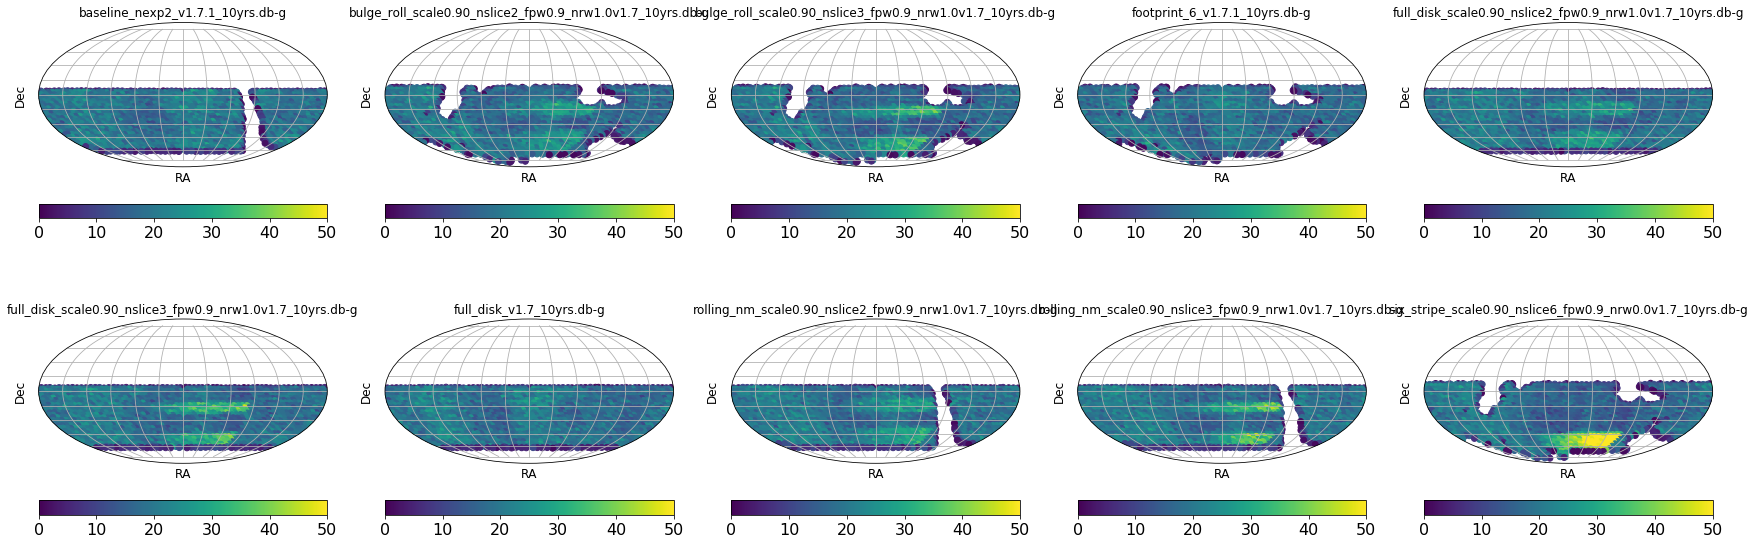

In [51]:
%%time

# groupby healpix
bydic = {
        "observationStartMJD": "count",
        "fieldRA" : "mean",
        "fieldDec": "mean",
        "fieldGl" : "min",
        "fieldGb": "min",
    }
f = 'g'
coord = 'C'

fig, axs = plt.subplots(2, 5, figsize=(30, 10),
                            subplot_kw={'projection': 'mollweide'}); 
axs = axs.flatten()

for i, dbname in enumerate( dblist_v171 ):  
    df_opsim = df_dic[dbname]
    #if i==31:
    #    # for opsim without proposal info
    #    df = df_opsim
    #else:
    slicer = df_opsim['proposalId'] == 1 
    df = df_opsim[slicer]

    df = df.groupby(by=['pixId','filter'], as_index=False).agg(bydic).rename(columns={"observationStartMJD": "Nv"})
    
    df_f = df[ df['filter']==f ]
    if coord=='G':
        x = df_f['fieldGl'].values
        y = df_f['fieldGb'].values       
    else:
        x = df_f['fieldRA'].values
        y = df_f['fieldDec'].values
    c = df_f['Nv'].values
    if len(c)!=0:
        plot_mwd(axs[i], x, y, c, title=f, colorbar=True, vmax=50,)
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    axs[i].set_title(dbname + '-' + f)

    

In [52]:
fig.savefig(outDir+"footprint_v171_2yrs.png")

In [41]:
df_Nv = pd.DataFrame(columns=['db','u', 'g', 'r', 'i', 'z', 'y'])

for dbname in dblist_v17:

    df_one = df_dic[ dbname ]
    df_wfd = df_one[df_one.proposalId==1]
    Nv_dic = df_wfd.groupby(by='filter').count()['observationStartMJD'].to_dict()
    
    Nv_dic['db'] = dbname
    df_Nv.loc[len(df_Nv.index)] = Nv_dic


In [42]:
df_Nv.to_csv(outDir+"df_Nv_v17_2yrs.csv", index=False)

In [44]:
df_Nv.head()

db      u      g      r      i      z  \
0          baseline_nexp1_v1.7_10yrs.db  21319  29699  73965  75481  68096   
1          baseline_nexp2_v1.7_10yrs.db  20701  27342  67456  69099  62823   
2  cadence_drive_gl100_gcbv1.7_10yrs.db  19258  34412  71348  66206  60136   
3      cadence_drive_gl100v1.7_10yrs.db  19719  33257  70487  66145  60528   
4  cadence_drive_gl200_gcbv1.7_10yrs.db  17626  44208  76618  61726  56237   

       y  
0  83658  
1  77524  
2  72739  
3  73261  
4  68358